# ML Tech Interview

Hello and welcome to the Machine Learning Tech Interview. This interview will be divided in two parts: the theoretical part and the practical/coding part. 

### **I will review only the scripts that will be sent (by pull request on this repo) by 1:00 pm**

Good Luck!!

## Theoretical Part

Please answer the following questions. 

#### What are the assumptions of a linear model (or any other type of model)?

We assume that:
    1. the relationship between the variables is linear 
    2. the variables are on a normal distribution
    3. the correlation coefficents between independent variables is <1 
    4. data points are independent of one another
    5.residuals are equal across the regression line

#### What’s the difference between K Nearest Neighbor and K-means Clustering?

K Nearest Neighbour(KNN) is a classification algorithm, K-means is a clustering algorithm. 

The K also means different things. The 'K' in KNN refers to the number of neighbours that determine a new data points position. In contrast, the 'K' in K-means is the number of clusters we want to group our data into. 

#### How do you address overfitting?

1. Add more data
2. Reduce features
3. Dimensionality reduction (in extreme cases)

#### Explain Naive Bayes algorithms.

NB algorithms are machine learning models used for classification. They're based on Bayes theorum, a probability theory that helps to predict the probability of event A given an event B (or multiple B's) has already happened. 

We can use these algorithms for both multinomial or bernoilli distributions. 

#### When do you use an AUC-ROC score? What kind of information can you gather from it?

AUC stands for "Area Under the Curve". 
 
We use it when we want to check the performance of a multivariate classification. It tells us how good our model is a putting data into the designated categories. The closer the score is to 1, the more accurate the model is at making predictions.  

#### What is cross validation?

It is a model validation technique. It tells us how well a model will translate to new data. We split a given dataset into training and testing data, apply our model to the train data, then validate it using the test data.

#### What are confounding variables?

Other variables other than our independent variable that also impact our dependent variable.

#### If an important metric for our company stopped appearing in our data source, how would you investigate the causes?

?

## Practical Machine Learning

In this challenge, you will showcase your knowledge in feature engineering, dimensionality reduction, model selection and evaluation, hyperparameter tuning, and any other techniques of machine learning.

There isn't a correct solution to this challenge. All we would like to learn is your thinking process that demonstrates your knowledge, experience, and creativity in developing machine learning models. Therefore, in addition to developing the model and optimizing its performance, you should also elaborate your thinking process and justify your decisions thoughout the iterative problem-solving process.

The suggested time to spend on this challenge is 90-120 minutes. If you don't have time to finish all the tasks you plan to do, simply document the to-dos at the end of your response.

#### Instructions:

- Download the housing prices data set (housing_prices.csv). The data is big enough to showcase your thoughts but not so that processing power will be a problem.
- Using Python, analyze the features and determine which feature set to select for modeling.
- Train and cross validate several regression models, attempting to accurately predict the SalePrice target variable.
- Evaluate all models and show comparison of performance metrics.
- State your thoughts on model performance, which model(s) you would select, and why.

#### Deliverables Checklist:

- Python code.
- Your thinking process.
- The features selected for machine learning.
- The results (e.g., performance metrics) of your selected model(s).

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
#import tensorflow as tf

## Import Data

In [2]:
data = pd.read_csv('housing_prices.csv')

## Import Functions

In [3]:
def explore_data(df):
    # this function applies many exploratory techniques to a given dataframe
    display("Head", 
            df.head()
            .style
            .background_gradient(cmap='Blues')
           ) 
    display("Data Types",
            df.dtypes
            .to_frame()
           ) 
    display("Data Types Count",
            df.dtypes
            .to_frame()[0]
            .value_counts()
            .to_frame()
           )
    display("Nan Values per Column", 
            df.isna()
            .sum()
            .to_frame()
            .sort_values(by=[0], ascending=False)
           )
    display("Descriptive Statistics", 
            df.describe()
           )
    display("Correlation Matrix", 
            df.corr()
            .style.background_gradient(cmap='coolwarm')
            .set_precision(2)
           )

## Explore Data

In [4]:
explore_data(data)

'Head'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,nan,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,nan,nan,nan,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,nan,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,nan,nan,nan,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,nan,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,nan,nan,nan,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,nan,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,nan,nan,nan,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,nan,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,nan,nan,nan,0,12,2008,WD,Normal,250000


'Data Types'

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
Alley,object
LotShape,object
LandContour,object
Utilities,object


'Data Types Count'

,0
object,43
int64,35
float64,3


'Nan Values per Column'

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
FireplaceQu,690
LotFrontage,259
GarageYrBlt,81
GarageCond,81
GarageType,81
GarageFinish,81


'Descriptive Statistics'

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


'Correlation Matrix'

## Defining Objectives

I will aim to build a model that can accurately predict the sale price of a property. 

I'm choosing RMSE as our preferred performance metric.  That's because RMSE is more useful when large errors are particularly undesirable. In this case, we want to avoid large errors, because wrongly predicting the sale price of a house could lead to very poor investment decisions. 

I will aim to build a model that has as small a RMSE as possible.

## Cleaning Data

Firstly, in light of no accompanying documentation to explain the column headers, we will remove columns where the variable is unclear. 

In [5]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [6]:
data = data.drop(['MasVnrArea','BsmtCond','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                 'BsmtExposure','CentralAir','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF',
                 '3SsnPorch','MiscVal','MasVnrType','BsmtExposure','BsmtFinType2','BsmtQual',
                  'BsmtFinType1','MiscFeature'],axis=1)

We can see that the majority of the data in 'PoolQC' is nan values. We'll drop it. Subsequently, we can also drop 'Pool Area', as very few properties have pools.

In [7]:
data['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [8]:
data = data.drop('PoolQC', axis=1)

In [9]:
data['PoolArea'].value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [10]:
data = data.drop('PoolArea', axis=1)

'Alley' and 'Fence' also have many nan values. Upon exploration, whilst 'Grvl' and 'Pave' would seem to correspond to "Gravel" and "Pavement", it is not clear what the values in 'Fence' mean. We'll drop Fence, and we'll also drop Alley, because it doesn't seem to add much value. 

In [11]:
display(data['Alley'].value_counts())
display(data['Fence'].value_counts())

Grvl    50
Pave    41
Name: Alley, dtype: int64

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [12]:
data = data.drop(['Alley','Fence'], axis=1)

Let's explore our cleaned dataset:

In [13]:
explore_data(data) 

'Head'

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,ExterQual,ExterCond,Foundation,Heating,HeatingQC,Electrical,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,SBrkr,1710,1,0,2,1,3,1,Gd,8,Typ,0,nan,Attchd,2003,RFn,2,548,TA,TA,Y,0,61,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,TA,TA,CBlock,GasA,Ex,SBrkr,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976,RFn,2,460,TA,TA,Y,298,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,SBrkr,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001,RFn,2,608,TA,TA,Y,0,42,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,TA,TA,BrkTil,GasA,Gd,SBrkr,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998,Unf,3,642,TA,TA,Y,0,35,272,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,Gd,TA,PConc,GasA,Ex,SBrkr,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000,RFn,3,836,TA,TA,Y,192,84,0,0,12,2008,WD,Normal,250000


'Data Types'

,0
Id,int64
MSSubClass,int64
MSZoning,object
LotFrontage,float64
LotArea,int64
Street,object
LotShape,object
LandContour,object
Utilities,object
LotConfig,object


'Data Types Count'

,0
object,32
int64,25
float64,2


'Nan Values per Column'

,0
FireplaceQu,690
LotFrontage,259
GarageFinish,81
GarageYrBlt,81
GarageType,81
GarageQual,81
GarageCond,81
Electrical,1
KitchenAbvGr,0
TotRmsAbvGrd,0


'Descriptive Statistics'

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,BsmtFullBath,...,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,1515.463699,0.425342,...,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,15.060959,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,525.480383,0.518911,...,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,55.757415,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,334.000000,0.000000,...,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,1129.500000,0.000000,...,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,1464.000000,0.000000,...,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,1776.750000,1.000000,...,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,5642.000000,3.000000,...,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,480.000000,12.000000,2010.000000,755000.000000


'Correlation Matrix'

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
Id,1,0.011,-0.011,-0.033,-0.028,0.013,-0.013,-0.022,0.0083,0.0023,-0.02,0.0056,0.0068,0.038,0.003,0.027,-0.02,7.2e-05,0.017,0.018,-0.03,-0.00048,0.0029,0.0013,0.021,0.00071,-0.022
MSSubClass,0.011,1,-0.39,-0.14,0.033,-0.059,0.028,0.041,0.075,0.0035,-0.0023,0.13,0.18,-0.023,0.28,0.04,-0.046,0.085,-0.04,-0.099,-0.013,-0.0061,-0.012,-0.026,-0.014,-0.021,-0.084
LotFrontage,-0.011,-0.39,1,0.43,0.25,-0.059,0.12,0.089,0.4,0.1,-0.0072,0.2,0.054,0.26,-0.0061,0.35,0.27,0.07,0.29,0.34,0.089,0.15,0.011,0.041,0.011,0.0074,0.35
LotArea,-0.033,-0.14,0.43,1,0.11,-0.0056,0.014,0.014,0.26,0.16,0.048,0.13,0.014,0.12,-0.018,0.19,0.27,-0.025,0.15,0.18,0.17,0.085,-0.018,0.043,0.0012,-0.014,0.26
OverallQual,-0.028,0.033,0.25,0.11,1,-0.092,0.57,0.55,0.59,0.11,-0.04,0.55,0.27,0.1,-0.18,0.43,0.4,0.55,0.6,0.56,0.24,0.31,-0.11,0.065,0.071,-0.027,0.79
OverallCond,0.013,-0.059,-0.059,-0.0056,-0.092,1,-0.38,0.074,-0.08,-0.055,0.12,-0.19,-0.061,0.013,-0.087,-0.058,-0.024,-0.32,-0.19,-0.15,-0.0033,-0.033,0.07,0.055,-0.0035,0.044,-0.078
YearBuilt,-0.013,0.028,0.12,0.014,0.57,-0.38,1,0.59,0.2,0.19,-0.038,0.47,0.24,-0.071,-0.17,0.096,0.15,0.83,0.54,0.48,0.22,0.19,-0.39,-0.05,0.012,-0.014,0.52
YearRemodAdd,-0.022,0.041,0.089,0.014,0.55,0.074,0.59,1,0.29,0.12,-0.012,0.44,0.18,-0.041,-0.15,0.19,0.11,0.64,0.42,0.37,0.21,0.23,-0.19,-0.039,0.021,0.036,0.51
GrLivArea,0.0083,0.075,0.4,0.26,0.59,-0.08,0.2,0.29,1,0.035,-0.019,0.63,0.42,0.52,0.1,0.83,0.46,0.23,0.47,0.47,0.25,0.33,0.0091,0.1,0.05,-0.037,0.71
BsmtFullBath,0.0023,0.0035,0.1,0.16,0.11,-0.055,0.19,0.12,0.035,1,-0.15,-0.065,-0.031,-0.15,-0.042,-0.053,0.14,0.12,0.13,0.18,0.18,0.067,-0.05,0.023,-0.025,0.067,0.23


There are still 32 categorical columns in the dataset. If we had more time, it would be worth transforming each of these into ints, to see whether there is any correlation. But as we're short on time, let's drop all the remaining object columns. 

I feel comfortable doing this because the variable I'd like to predict is sale price. In the above correlation matrix we can see that there are a couple of med-high correlated variables, which suggests we may have enough to work with to make an accurate prediction without transforming all the object variables.

In [14]:
data = data.select_dtypes(exclude=['object'])

In [15]:
data.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
ScreenPorch        int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

### 

In the correlation matrix above, we can see some variables that are highly correlated with the data. Let's plot them.

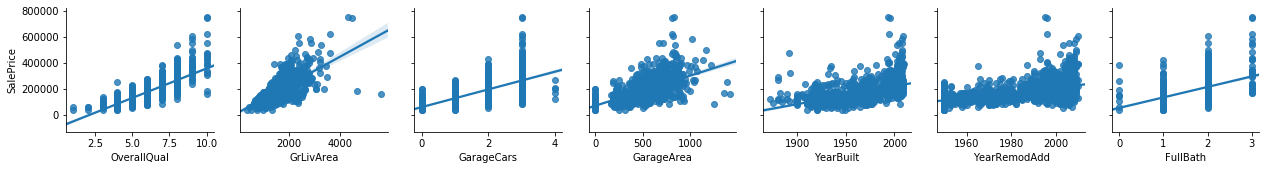

In [16]:
sns.pairplot(data,x_vars=['OverallQual','GrLivArea',
                         'GarageCars','GarageArea',
                          'YearBuilt','YearRemodAdd',
                          'FullBath'],y_vars='SalePrice',kind='reg')

There are some visual suggests of linear relationships here. For the model, it would make sense to first focus on these highly correlated variables initially to see if they are sufficient in making accurate predictions. We can always return to the other variables if we need them. 

Finally, let's fill in the nans with 0 to make the data ready for machine learning.

In [17]:
data = data.fillna(0)

## Building the Model

### Setting variables

In [18]:
cols = ['OverallQual','GrLivArea',
        'GarageCars','GarageArea',
        'YearBuilt','YearRemodAdd',
        'FullBath'] # our highly correlated variables. 
X = data[cols]
y = data['SalePrice'] # the variable we want to predict

### Splitting data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

### Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
display(model.intercept_)
display(model.coef_)

-1133325.9521003368

array([22540.40714383,    54.79968847, 12073.26473158,    27.18989996,
         309.00952888,   234.04113033, -9273.60989048])

In [24]:
y_pred = model.predict(X_test)b


In [25]:
from sklearn import metrics

In [26]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

27237.153192276335
1654040273.680454
165.0368237463274


In [27]:
data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Here, the RMSE is €165. This is really good, given the range of values in SalePrice shown above.

Let's check if our model is overfitted.

In [28]:
y_pred = model.predict(X_train)
print("r squared score = ", sklearn.metrics.r2_score(y_train, y_pred))

r squared score =  0.7560459354283473


In [29]:
y_test_pred = model.predict(X_test)
print("r squared score = ", sklearn.metrics.r2_score(y_test_pred, y_test))

r squared score =  0.6204107821625322


It might be a little overfitted.

Let's increase our training data to 90%.

In [30]:
X_train09, X_test09, y_train09, y_test09 = train_test_split(X, y, test_size=0.10)

In [31]:
model09 = LinearRegression()
model09.fit(X_train09, y_train09)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_09_pred = model.predict(X_train09)
print("r squared score = ", sklearn.metrics.r2_score(y_09_pred, y_train09))

r squared score =  0.6555910535777949


In [33]:
y_test09_pred = model.predict(X_test09)
print("r squared score = ", sklearn.metrics.r2_score(y_test09_pred, y_test09))

r squared score =  0.7401592443732623


It's much better now. The r squared figures are very close to each other.

Let's try some other models to see how they compare.

### Decision Tree Regression

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
regr = DecisionTreeRegressor(random_state = 29)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 29)

In [37]:
model = regr.fit(X_train, y_train)

In [38]:
regr.score(X_test, y_test)

0.6463874408515429

Not a bad score, but not close enough to 1 to make it better than the Linear Regression model.

### KNN 

In [39]:
from sklearn.neighbors import KNeighborsRegressor

In [40]:
knnr = KNeighborsRegressor(n_neighbors = 3)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 29)

In [42]:
model = knnr.fit(X_train, y_train)  #fit the model
y_pred = knnr.predict(X_test)

In [43]:
print(metrics.mean_absolute_error(y_test,y_pred))
print(metrics.mean_squared_error(y_test,y_pred))
print(np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))

30361.07123287671
2293964723.9235926
174.24428608386765


A similar, but worse, score than Linear Regression.

### Conclusions

Our linear regression model performed well, and performed better when we expanded the training data. It seems like a good model for us to work on. However, before making this decision, I'd spend more time changing the feature columns to see if it changed the accuracy of the model. I'd also transform a few of the categorical columns in the original dataset to see if they helped improve the accuracy of the prediction.